# CUSTOMER CHURN PREDICTION

### A Bank wants to take care of customer retention for its product: savings accounts. The bank wants you to identify customers likely to churn balances below the minimum balance. You have the customers information such as age, gender, demographics along with their transactions with the bank.

### Your task as a data scientist would be to predict the propensity to churn for each customer.

## Loading the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
plt.style.use("seaborn")
from sklearn.metrics import accuracy_score

train=pd.read_csv(r"C:\Users\samya\Downloads\Customer_Churn_Train_Dataset.csv")
test=pd.read_csv(r"C:\Users\samya\Downloads\Customer_Churn_Test_Dataset.csv")
train.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [2]:
test.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
0,30303,3218,90,NaN,NaN,self_employed,660,1,120,18.0,2221.03,9358.92,2760.30,1129.50,1476.59,8571.61,8571.61,143.04,1671.36,5575.97
1,30305,5135,45,Male,0.0,salaried,836,2,101,61.0,1516.18,2124.10,1833.56,1532.97,0.33,0.33,231.36,310.89,1678.25,2306.98
2,30306,1234,64,Female,0.0,retired,660,2,1357,0.0,2265.78,800.44,2033.91,6970.21,10203.09,2226.78,13571.49,2142.91,2700.18,1016.93
3,30307,3475,44,Male,0.0,salaried,708,2,1028,NaN,1869.98,2069.98,2048.15,2158.76,0.17,0.17,271.60,0.17,1990.67,2069.98
4,30308,4400,57,Female,0.0,salaried,660,2,145,7.0,5286.38,3072.10,3169.69,710.19,2214.54,0.26,0.26,0.26,3606.58,3244.17


## Checking duplicate rows

In [3]:
train_duplicate=train.drop_duplicates()
train_duplicate

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,1845,10,Female,0.0,student,1020.0,2,1207,70.0,...,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
28378,30298,4919,34,Female,0.0,self_employed,1046.0,2,223,14.0,...,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
28379,30299,297,47,Male,0.0,salaried,1096.0,2,588,0.0,...,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1
28380,30300,2585,50,Male,3.0,self_employed,1219.0,3,274,NaN,...,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0


In [4]:
test_duplicate=test.drop_duplicates()
test_duplicate

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
0,30303,3218,90,NaN,NaN,self_employed,660,1,120,18.0,2221.03,9358.92,2760.30,1129.50,1476.59,8571.61,8571.61,143.04,1671.36,5575.97
1,30305,5135,45,Male,0.0,salaried,836,2,101,61.0,1516.18,2124.10,1833.56,1532.97,0.33,0.33,231.36,310.89,1678.25,2306.98
2,30306,1234,64,Female,0.0,retired,660,2,1357,0.0,2265.78,800.44,2033.91,6970.21,10203.09,2226.78,13571.49,2142.91,2700.18,1016.93
3,30307,3475,44,Male,0.0,salaried,708,2,1028,NaN,1869.98,2069.98,2048.15,2158.76,0.17,0.17,271.60,0.17,1990.67,2069.98
4,30308,4400,57,Female,0.0,salaried,660,2,145,7.0,5286.38,3072.10,3169.69,710.19,2214.54,0.26,0.26,0.26,3606.58,3244.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8542,42276,1087,21,Female,0.0,student,715,2,586,24.0,4281.67,648.00,1615.64,620.48,1661.93,0.57,1.82,0.57,3805.49,668.27
8543,42277,3344,18,Male,0.0,student,625,2,268,5.0,3460.94,2746.65,1760.94,569.05,25000.63,2173.49,24286.34,0.63,2894.44,1814.58
8544,42279,5415,41,Female,0.0,salaried,814,1,39,189.0,7192.91,7564.34,7519.69,7556.44,0.09,0.09,357.23,0.09,7390.94,7576.91
8545,42280,844,45,Male,0.0,salaried,160,3,3230,164.0,2128.10,783.50,1535.15,1983.77,0.10,0.10,2142.96,142.96,2018.64,1188.11


## Checking for missing values

In [5]:
train.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [6]:
test.isnull().sum()

customer_id                         0
vintage                             0
age                                 0
gender                            216
dependents                        643
occupation                         37
city                                0
customer_nw_category                0
branch_code                         0
days_since_last_transaction       848
current_balance                     0
previous_month_end_balance          0
average_monthly_balance_prevQ       0
average_monthly_balance_prevQ2      0
current_month_credit                0
previous_month_credit               0
current_month_debit                 0
previous_month_debit                0
current_month_balance               0
previous_month_balance              0
dtype: int64

#### Now, we are going to fill these missing values with thier respective mode.

### 'Gender'

In [7]:
train['gender'].fillna(train['gender'].mode()[0],inplace=True)
test['gender'].fillna(test['gender'].mode()[0],inplace=True)
train["gender"].value_counts()

Male      17073
Female    11309
Name: gender, dtype: int64

In [8]:
train["dependents"].fillna(train["dependents"].mode()[0],inplace=True)
test["dependents"].fillna(test["dependents"].mode()[0],inplace=True)
train["dependents"].value_counts()

0.0     23898
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
36.0        1
52.0        1
25.0        1
9.0         1
50.0        1
32.0        1
8.0         1
Name: dependents, dtype: int64

### 'occupation'

In [9]:
train["occupation"].fillna(train["occupation"].mode()[0],inplace=True)
test["occupation"].fillna(test["occupation"].mode()[0],inplace=True)
train["occupation"].value_counts()

self_employed    17556
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

### 'city'

In [10]:
train["city"].fillna(train["city"].mode()[0],inplace=True)
test["city"].fillna(test["city"].mode()[0],inplace=True)
train["city"].value_counts()

1020.0    4282
1096.0    2016
409.0     1334
146.0     1291
834.0     1138
          ... 
629.0        1
527.0        1
1212.0       1
530.0        1
70.0         1
Name: city, Length: 1604, dtype: int64

### 'days since last transaction'

In [11]:
train["days_since_last_transaction"].fillna(train["days_since_last_transaction"].mode()[0],inplace=True)
test["days_since_last_transaction"].fillna(test["days_since_last_transaction"].mode()[0],inplace=True)
train["days_since_last_transaction"].value_counts()

0.0      4895
3.0       831
14.0      654
4.0       632
6.0       596
         ... 
170.0       1
218.0       1
334.0       1
288.0       1
321.0       1
Name: days_since_last_transaction, Length: 360, dtype: int64

In [12]:
train.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,1020.0,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,0.0,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,Male,0.0,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


## Rounding off

In [13]:
train=train.round()

In [14]:
test=test.round()

## Encoding the categorical variables

In [15]:
train.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [17]:
train["age"]=le.fit_transform(train["age"])
train["gender"]=le.fit_transform(train["gender"])
train["occupation"]=le.fit_transform(train["occupation"])
train["dependents"]=le.fit_transform(train["dependents"])
train["days_since_last_transaction"]=le.fit_transform(train["days_since_last_transaction"])

In [18]:
test["age"]=le.fit_transform(test["age"])
test["gender"]=le.fit_transform(test["gender"])
test["occupation"]=le.fit_transform(test["occupation"])
test["dependents"]=le.fit_transform(test["dependents"])
test["days_since_last_transaction"]=le.fit_transform(test["days_since_last_transaction"])

## High correlation filter

In [19]:
corr_test=test.corr().abs()
corr_test=corr_test.where(np.triu(np.ones(corr_test.shape),k=1).astype(bool))
corr_test

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
customer_id,NaN,0.000484,0.010521,0.008216,0.017894,0.022569,0.011050,0.001191,0.013077,0.003497,0.009332,0.010164,0.009538,0.005542,0.008855,0.010815,0.008306,0.011267,0.009676,0.009251
vintage,NaN,NaN,0.211249,0.062937,0.108185,0.188116,0.034341,0.165868,0.359191,0.068018,0.005537,0.004350,0.005066,0.002396,0.025317,0.021406,0.024206,0.021909,0.005954,0.004664
age,NaN,NaN,NaN,0.199112,0.035111,0.470709,0.023783,0.060161,0.040396,0.013199,0.037571,0.038665,0.044392,0.052969,0.011422,0.008641,0.007244,0.005785,0.039536,0.044304
gender,NaN,NaN,NaN,NaN,0.156856,0.065136,0.014391,0.055495,0.059759,0.039227,0.007852,0.010507,0.011053,0.014644,0.009045,0.009362,0.009314,0.008027,0.008822,0.011581
dependents,NaN,NaN,NaN,NaN,NaN,0.007341,0.009082,0.012547,0.002857,0.049690,0.005001,0.004567,0.005258,0.005777,0.005835,0.005132,0.004640,0.004402,0.004905,0.005412
occupation,NaN,NaN,NaN,NaN,NaN,NaN,0.001307,0.041363,0.043556,0.007294,0.005385,0.005356,0.005139,0.003518,0.007805,0.007858,0.007431,0.007466,0.005249,0.005588
city,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003563,0.032698,0.000850,0.002114,0.003431,0.004427,0.007645,0.004946,0.004756,0.004555,0.005096,0.002043,0.005129
customer_nw_category,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.234731,0.010615,0.016474,0.016292,0.021386,0.033563,0.029510,0.026387,0.027553,0.026124,0.018102,0.020613
branch_code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.032545,0.013230,0.012514,0.014412,0.017955,0.016308,0.013624,0.015322,0.012890,0.013610,0.013901
days_since_last_transaction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011941,0.011584,0.011530,0.009908,0.018259,0.015952,0.016010,0.012132,0.012314,0.011258


In [20]:
drop_test=[column for column in corr_test.columns if any(corr_test[column]>0.5)]
test=test.drop(test[drop_test],1)
drop_test

['previous_month_end_balance',
 'average_monthly_balance_prevQ',
 'average_monthly_balance_prevQ2',
 'previous_month_credit',
 'current_month_debit',
 'previous_month_debit',
 'current_month_balance',
 'previous_month_balance']

#### These columns were dropped by high correlation filter. Thus, we need to drop these in train data too.

In [21]:
train=train.drop(train[drop_test],1)

<AxesSubplot:>

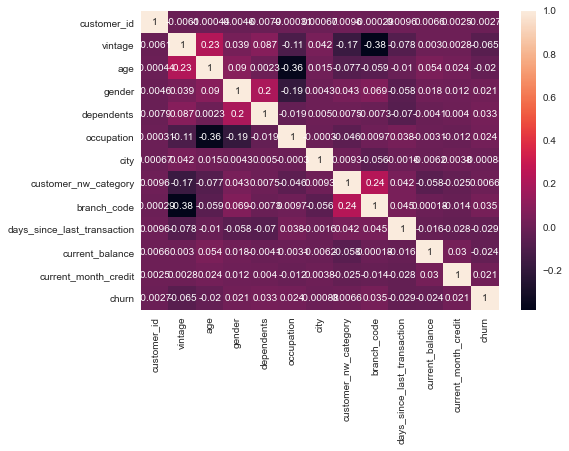

In [22]:
sb.heatmap(train.corr(),annot=True)

## Univariate Analysis

### 'vintage'

In [23]:
train["vintage"].describe()

count    28382.000000
mean      2364.336446
std       1610.124506
min        180.000000
25%       1121.000000
50%       2018.000000
75%       3176.000000
max      12899.000000
Name: vintage, dtype: float64

C:\Users\samya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vintage'>

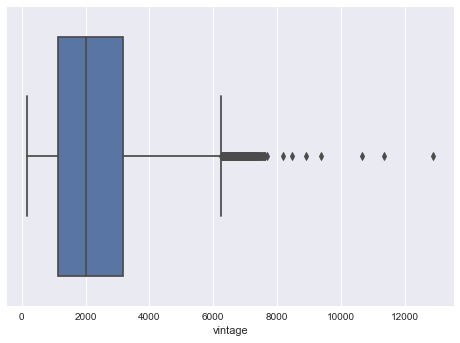

In [24]:
sb.boxplot("vintage",data=train)

In [25]:
train["vintage"].loc[train["vintage"]>8000]=train["vintage"].median()

C:\Users\samya\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


C:\Users\samya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vintage'>

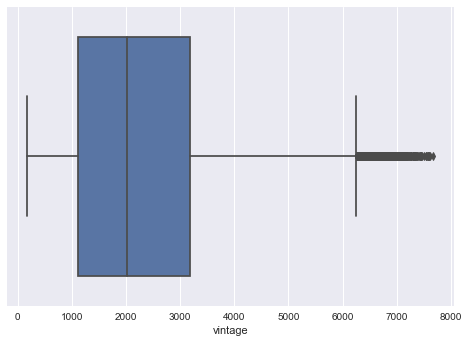

In [26]:
sb.boxplot("vintage",data=train)

C:\Users\samya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vintage'>

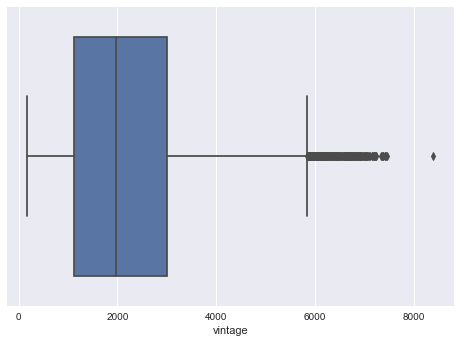

In [27]:
sb.boxplot("vintage",data=test)

In [28]:
test["vintage"].loc[test["vintage"]>8000]=test["vintage"].median()

C:\Users\samya\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


C:\Users\samya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vintage'>

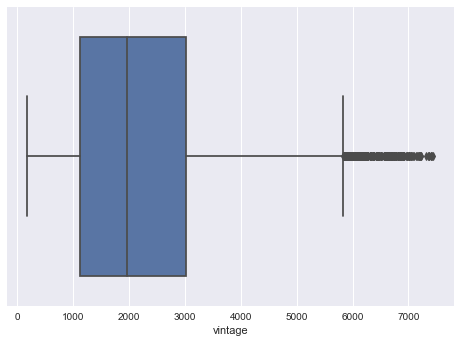

In [29]:
sb.boxplot("vintage",data=test)

#### All the outliers are corrected

### 'age'

In [30]:
train["age"].describe()

count    28382.000000
mean        47.208336
std         17.807163
min          0.000000
25%         35.000000
50%         45.000000
75%         59.000000
max         89.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age'>

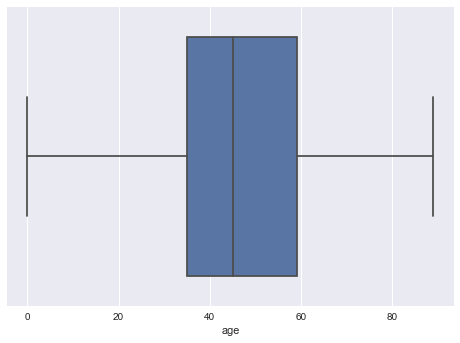

In [31]:
sb.boxplot(x="age",data=train)

<AxesSubplot:xlabel='age'>

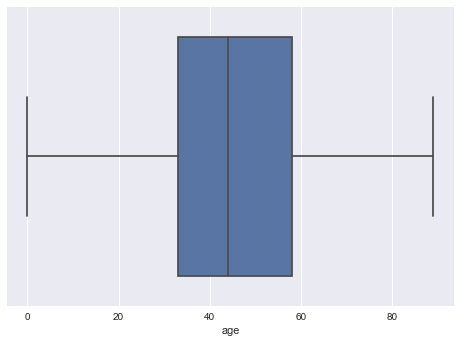

In [32]:
sb.boxplot(x="age",data=test)

#### No outliers in 'age'

### 'gender'

In [33]:
train["gender"].describe()

count    28382.000000
mean         0.601543
std          0.489589
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: gender, dtype: float64

C:\Users\samya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

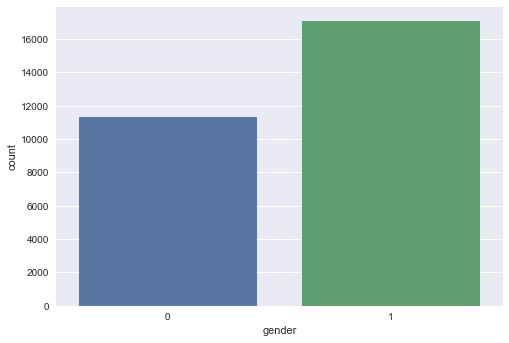

In [34]:
sb.countplot("gender",data=train)

C:\Users\samya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

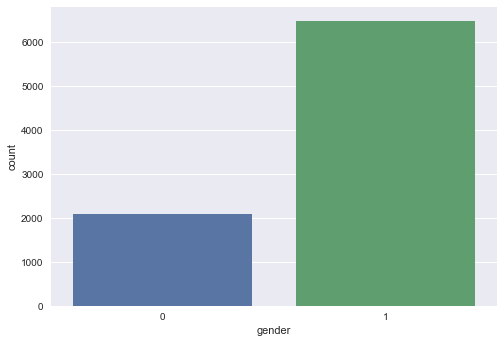

In [35]:
sb.countplot("gender",data=test)

#### Thus, males are higher than females in count

### 'dependents'

In [36]:
train["dependents"].describe()

count    28382.000000
mean         0.312346
std          0.812460
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         14.000000
Name: dependents, dtype: float64

C:\Users\samya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dependents', ylabel='count'>

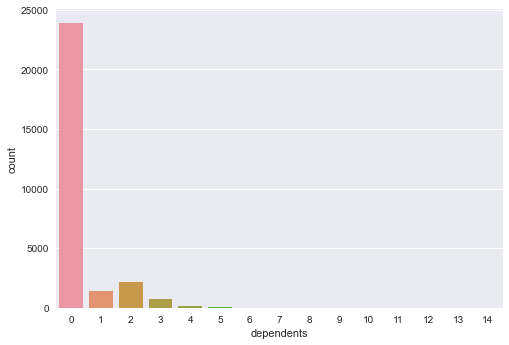

In [37]:
sb.countplot("dependents",data=train)

C:\Users\samya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dependents', ylabel='count'>

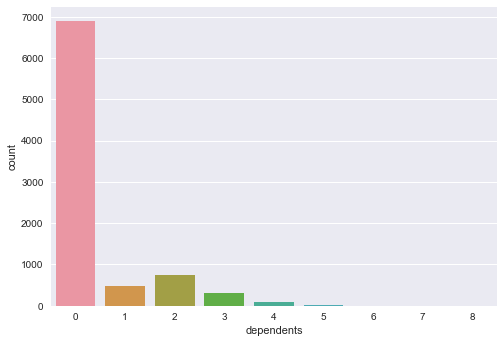

In [38]:
sb.countplot("dependents",data=test)

#### Thus, majority of people are independent
### 'occupation'

In [39]:
train["occupation"].describe()

count    28382.000000
mean         2.689451
std          0.714303
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          4.000000
Name: occupation, dtype: float64

C:\Users\samya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='occupation', ylabel='count'>

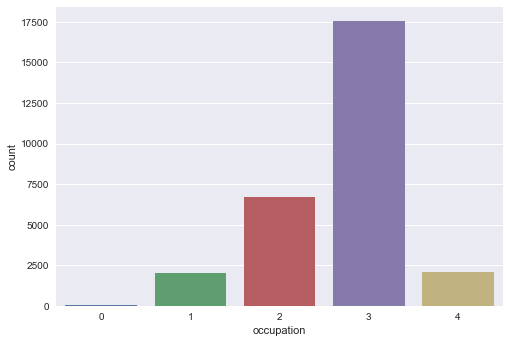

In [40]:
sb.countplot("occupation",data=train)

C:\Users\samya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='occupation', ylabel='count'>

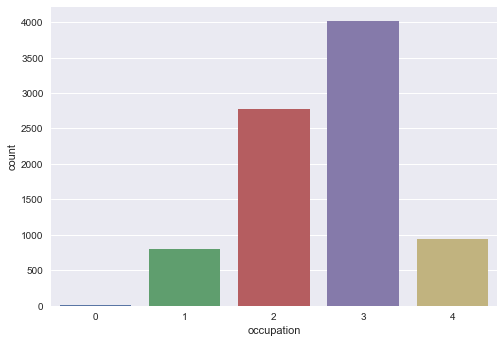

In [41]:
sb.countplot("occupation",data=test)

#### Thus, majority are either self employed or salaried.

### 'city'

In [42]:
train["city"].describe()

count    28382.000000
mean       802.444014
std        428.316238
min          0.000000
25%        409.000000
50%        879.000000
75%       1096.000000
max       1649.000000
Name: city, dtype: float64

C:\Users\samya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='city'>

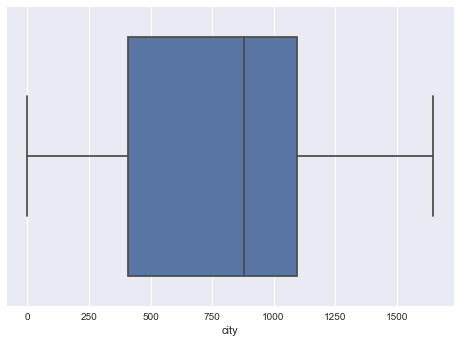

In [43]:
sb.boxplot("city",data=train)

C:\Users\samya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='city'>

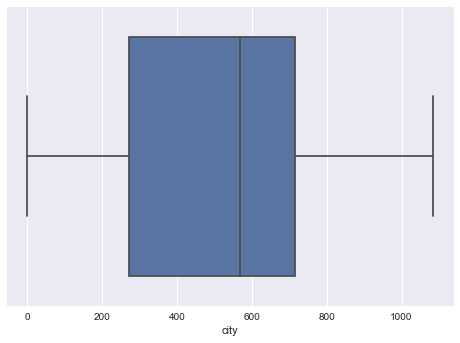

In [44]:
sb.boxplot("city",data=test)

#### There are no outliers in 'city'
### 'customer_nw_category'

In [45]:
train["customer_nw_category"].describe()

count    28382.000000
mean         2.225530
std          0.660443
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: customer_nw_category, dtype: float64

C:\Users\samya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='customer_nw_category', ylabel='count'>

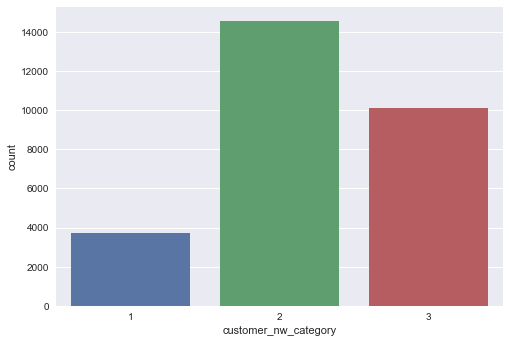

In [46]:
sb.countplot("customer_nw_category",data=train)

C:\Users\samya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='customer_nw_category', ylabel='count'>

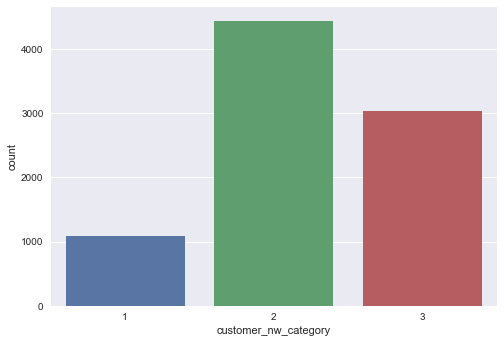

In [47]:
sb.countplot("customer_nw_category",data=test)

### 'branch code'

In [48]:
train["branch_code"].describe()

count    28382.000000
mean       925.975019
std        937.799129
min          1.000000
25%        176.000000
50%        572.000000
75%       1440.000000
max       4782.000000
Name: branch_code, dtype: float64

C:\Users\samya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='branch_code'>

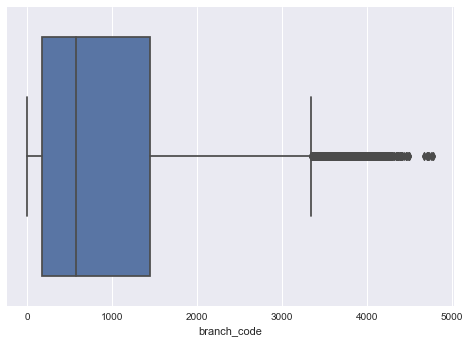

In [49]:
sb.boxplot("branch_code",data=train)

In [50]:
train["branch_code"].loc[train["branch_code"]>4000]=train["branch_code"].median()

C:\Users\samya\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


C:\Users\samya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='branch_code'>

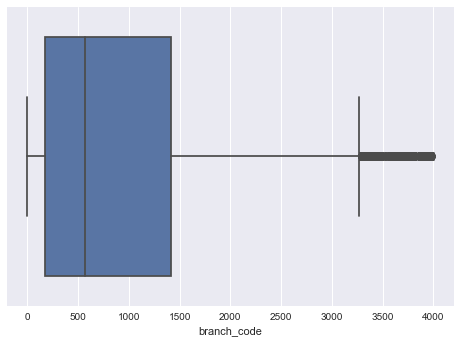

In [51]:
sb.boxplot("branch_code",data=train)

C:\Users\samya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='branch_code'>

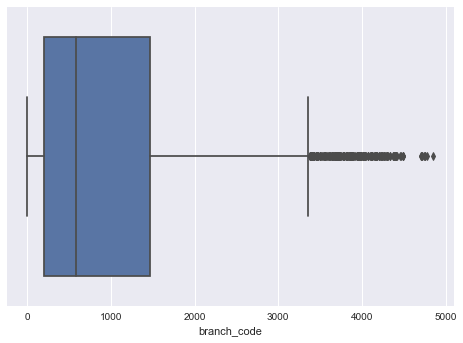

In [52]:
sb.boxplot("branch_code",data=test)

In [53]:
test["branch_code"].loc[test["branch_code"]>4000]=test["branch_code"].median()

C:\Users\samya\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


C:\Users\samya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='branch_code'>

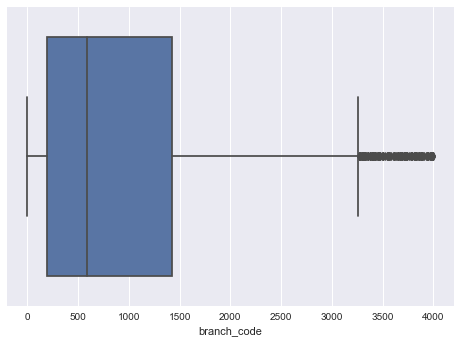

In [54]:
sb.boxplot("branch_code",data=test)

#### All the outliers are corrected

### 'days_since_last_transaction'

In [55]:
train["days_since_last_transaction"].describe()

count    28382.000000
mean        61.676696
std         83.330686
min          0.000000
25%          6.000000
50%         24.000000
75%         83.000000
max        359.000000
Name: days_since_last_transaction, dtype: float64

C:\Users\samya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='days_since_last_transaction'>

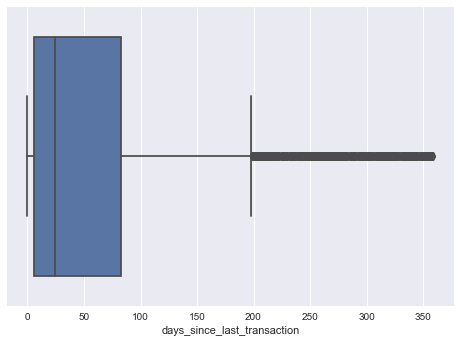

In [56]:
sb.boxplot("days_since_last_transaction",data=train)

C:\Users\samya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='days_since_last_transaction'>

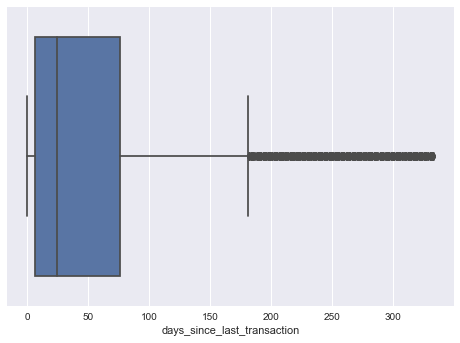

In [57]:
sb.boxplot("days_since_last_transaction",data=test)

### 'current_balance'

In [58]:
train["current_balance"].describe()

count    2.838200e+04
mean     7.380553e+03
std      4.259871e+04
min     -5.504000e+03
25%      1.784000e+03
50%      3.281000e+03
75%      6.635750e+03
max      5.905904e+06
Name: current_balance, dtype: float64

C:\Users\samya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='current_balance'>

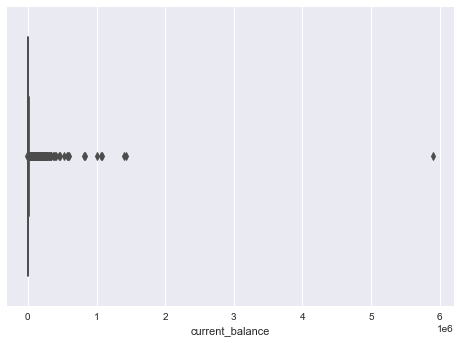

In [59]:
sb.boxplot("current_balance",data=train)

In [60]:
train["current_balance"].loc[train["current_balance"]>200000]=train["current_balance"].median()

C:\Users\samya\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


C:\Users\samya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='current_balance'>

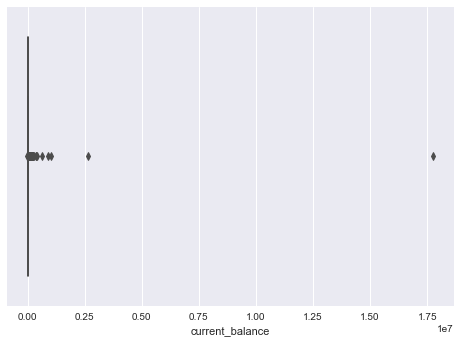

In [61]:
sb.boxplot("current_balance",data=test)

In [62]:
test["current_balance"].loc[test["current_balance"]>200000]=test["current_balance"].median()

C:\Users\samya\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


#### Thus, all the outliers are corrected

### 'current_month_credit'

In [63]:
train["current_month_credit"].describe()

count    2.838200e+04
mean     3.433213e+03
std      7.707145e+04
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      7.070000e+02
max      1.226984e+07
Name: current_month_credit, dtype: float64

C:\Users\samya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='current_month_credit'>

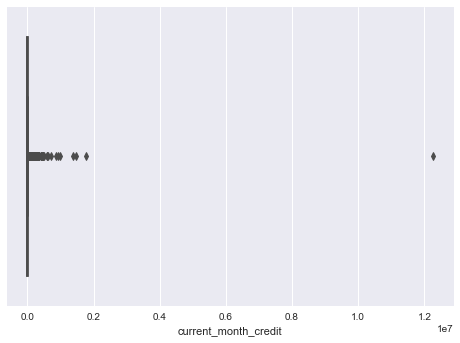

In [64]:
sb.boxplot("current_month_credit",data=train)

In [65]:
train["current_month_credit"].loc[train["current_month_credit"]>50000]=train["current_month_credit"].median()

C:\Users\samya\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


C:\Users\samya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='current_month_credit'>

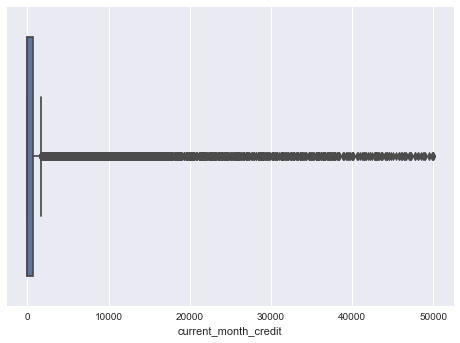

In [66]:
sb.boxplot("current_month_credit",data=train)

C:\Users\samya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='current_month_credit'>

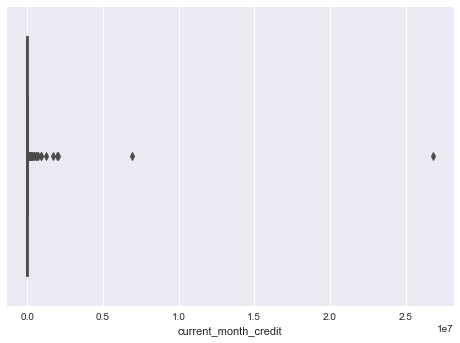

In [67]:
sb.boxplot("current_month_credit",data=test)

In [68]:
test["current_month_credit"].loc[test["current_month_credit"]>50000]=test["current_month_credit"].median()

C:\Users\samya\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


C:\Users\samya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='current_month_credit'>

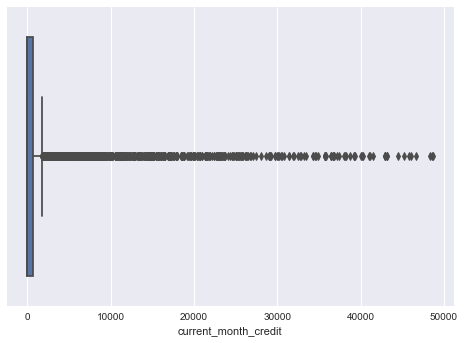

In [69]:
sb.boxplot("current_month_credit",data=test)

#### All the outliers are corrected

## Bivariate Analysis between 'churn' and

### 'vintage'

In [70]:
train.groupby("vintage")["churn"].median()

vintage
180     0.0
181     0.0
182     0.0
183     0.0
184     0.0
       ... 
7583    0.0
7593    0.0
7600    0.0
7616    0.0
7676    0.0
Name: churn, Length: 5466, dtype: float64

<AxesSubplot:xlabel='churn', ylabel='vintage'>

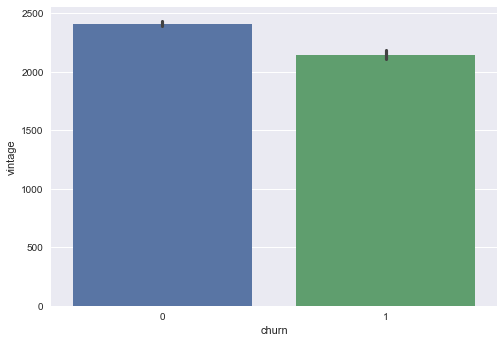

In [71]:
sb.barplot(x="churn",y="vintage",data=train)

### 'age'

In [72]:
train.groupby("age")["churn"].median()

age
0     0.5
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
85    0.0
86    0.0
87    0.0
88    0.0
89    0.0
Name: churn, Length: 90, dtype: float64

<AxesSubplot:xlabel='churn', ylabel='age'>

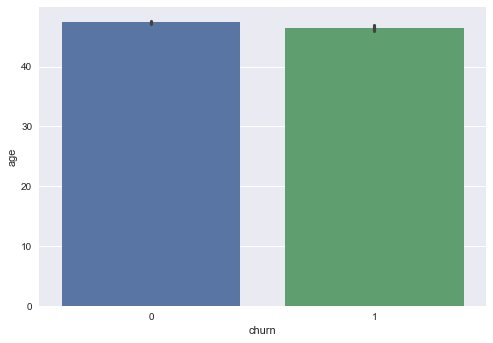

In [73]:
sb.barplot(x="churn",y="age",data=train)

### 'gender'

In [74]:
pd.crosstab(train["gender"],train["churn"])

churn,0,1
gender,,
0,9324,1985
1,13798,3275


<AxesSubplot:xlabel='churn', ylabel='gender'>

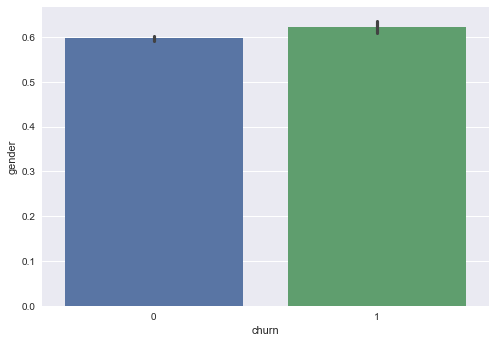

In [75]:
sb.barplot(x="churn",y="gender",data=train)

#### Thus, males are more likely to churn

### 'dependents'

In [76]:
pd.crosstab(train["dependents"],train["churn"])

churn,0,1
dependents,,
0,19636,4262
1,1076,319
2,1665,485
3,551,150
4,146,33
5,36,5
6,4,4
7,3,0
8,0,1


<AxesSubplot:xlabel='churn', ylabel='dependents'>

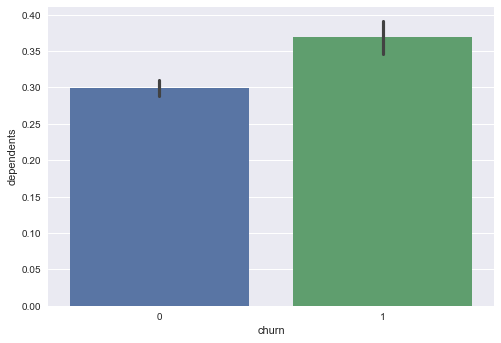

In [77]:
sb.barplot(x="churn",y="dependents",data=train)

#### Thus, females are more dependent than males

### 'occupation'

In [78]:
pd.crosstab(train["occupation"],train["churn"])

churn,0,1
occupation,,
0,36,4
1,1719,305
2,5557,1147
3,14076,3480
4,1734,324


<AxesSubplot:xlabel='occupation', ylabel='churn'>

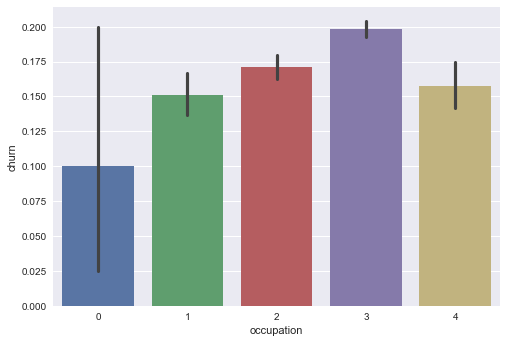

In [79]:
sb.barplot(x="occupation",y="churn",data=train)

#### Thus, self employed and salaried are less likely to churn

### 'city'

In [80]:
train.groupby("city")["churn"].median()

city
0.0       0.0
1.0       0.0
2.0       0.0
3.0       0.0
4.0       0.0
         ... 
1645.0    0.0
1646.0    1.0
1647.0    0.0
1648.0    0.0
1649.0    1.0
Name: churn, Length: 1604, dtype: float64

### 'customer_nw_category'

In [81]:
pd.crosstab(train["customer_nw_category"],train["churn"])

churn,0,1
customer_nw_category,,
1,3001,710
2,11953,2606
3,8168,1944


<AxesSubplot:xlabel='customer_nw_category', ylabel='churn'>

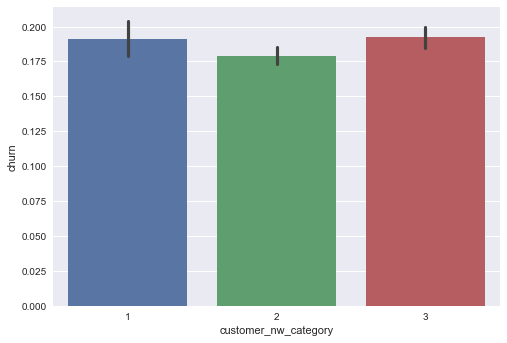

In [82]:
sb.barplot(x="customer_nw_category",y="churn",data=train)

### 'branch_code'

In [83]:
train.groupby("city")["churn"].median()

city
0.0       0.0
1.0       0.0
2.0       0.0
3.0       0.0
4.0       0.0
         ... 
1645.0    0.0
1646.0    1.0
1647.0    0.0
1648.0    0.0
1649.0    1.0
Name: churn, Length: 1604, dtype: float64

<AxesSubplot:xlabel='churn', ylabel='customer_nw_category'>

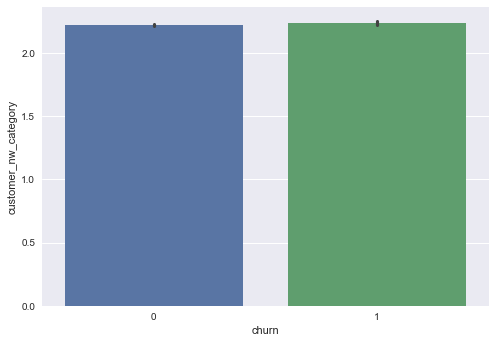

In [84]:
sb.barplot(x="churn",y="customer_nw_category",data=train)

### 'days_since_last_transaction'

In [85]:
train.groupby("city")["churn"].median()

city
0.0       0.0
1.0       0.0
2.0       0.0
3.0       0.0
4.0       0.0
         ... 
1645.0    0.0
1646.0    1.0
1647.0    0.0
1648.0    0.0
1649.0    1.0
Name: churn, Length: 1604, dtype: float64

<AxesSubplot:xlabel='churn', ylabel='days_since_last_transaction'>

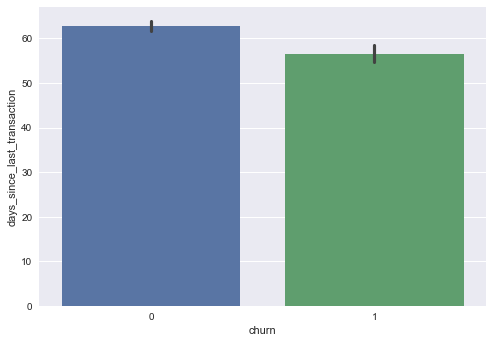

In [86]:
sb.barplot(x="churn",y="days_since_last_transaction",data=train)

### 'current_balance'

In [87]:
train.groupby("current_balance")["churn"].median()

current_balance
-5504.0      1.0
-5213.0      0.0
-4571.0      1.0
-3786.0      1.0
-3244.0      1.0
            ... 
 182811.0    0.0
 184837.0    0.0
 185779.0    0.0
 192365.0    1.0
 193100.0    0.0
Name: churn, Length: 11828, dtype: float64

<AxesSubplot:xlabel='churn', ylabel='current_balance'>

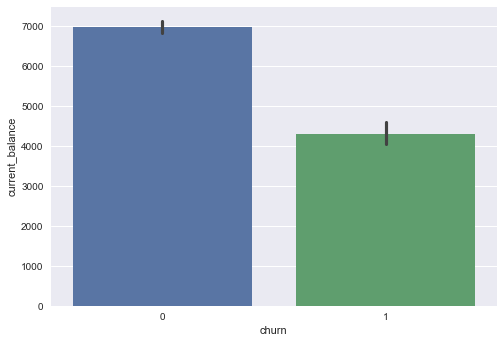

In [88]:
sb.barplot(x="churn",y="current_balance",data=train)

#### Thus, people who churn have lesser current_balance than those who don't

### 'current_month_credit'

In [89]:
train.groupby("current_month_credit")["churn"].median()

current_month_credit
0.0        0.0
1.0        0.0
2.0        0.0
3.0        0.0
4.0        0.0
          ... 
49006.0    0.0
49429.0    1.0
49880.0    0.0
49952.0    1.0
50000.0    0.0
Name: churn, Length: 4250, dtype: float64

<AxesSubplot:xlabel='churn', ylabel='current_month_credit'>

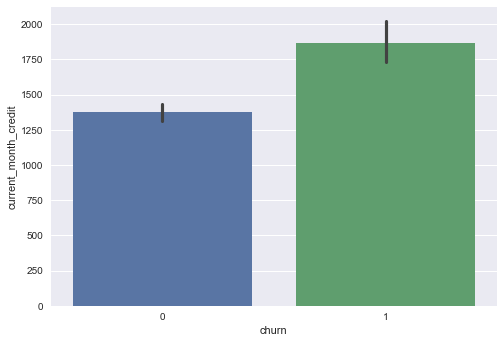

In [90]:
sb.barplot(x="churn",y="current_month_credit",data=train)

#### Thus, people who churn have more current_month_credit than those who don't

## Converting train data into x and y

In [91]:
x=train.drop(["churn"],axis=1)

y=train["churn"]

## Scaling the data

In [92]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

scaled_x=ss.fit_transform(x)
x=pd.DataFrame(scaled_x,columns=x.columns)

scaled_test=ss.fit_transform(test)
test=pd.DataFrame(scaled_test,columns=test.columns)

In [93]:
x.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,current_month_credit
0,-1.731304,0.481250,0.999147,0.813874,-0.384451,0.434765,-1.436917,-0.341489,-0.161298,1.923975,-0.423833,-0.312987
1,-1.731190,-1.278372,-0.741756,0.813874,-0.384451,0.434765,0.507942,-0.341489,2.589714,-0.020121,-0.092089,-0.312774
2,-1.730961,-0.003969,-0.966389,0.813874,-0.384451,-0.965225,-1.532642,-0.341489,-0.960087,-0.740157,-0.216736,-0.312774
3,-1.730847,-1.173729,2.346943,0.813874,-0.384451,0.434765,0.507942,-0.341489,-0.354842,1.011930,-0.353534,-0.312987
4,-1.730733,0.105034,-0.348649,0.813874,2.077251,0.434765,1.614620,1.172672,-0.571880,-0.044123,-0.468645,-0.312987


In [94]:
y.head()

0    0
1    0
2    0
3    1
4    1
Name: churn, dtype: int64

In [95]:
test.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,current_month_credit
0,-1.732855,0.624048,2.324685,0.566767,-0.435921,0.500368,0.417956,-1.870974,-0.886827,-0.513396,-0.365728,-0.013628
1,-1.732278,1.887654,-0.095265,0.566767,-0.435921,-0.729967,1.016487,-0.345968,-0.908044,0.055940,-0.424321,-0.324682
2,-1.731989,-0.683722,0.926492,-1.764395,-0.435921,-1.960302,0.417956,-0.345968,0.494469,-0.751723,-0.361988,1.824052
3,-1.731700,0.793451,-0.149042,0.566767,-0.435921,-0.729967,0.581192,-0.345968,0.127091,-0.751723,-0.394900,-0.324682
4,-1.731412,1.403173,0.550055,-1.764395,-0.435921,-0.729967,0.417956,-0.345968,-0.858911,-0.659040,-0.110995,0.141793


## Evaluation metric

In [96]:
from sklearn.metrics import mean_squared_log_error as mse
def error(true,pred):
    return np.sqrt(mse(true,pred))

## Creating train and test data for x and y

In [97]:
from sklearn.model_selection import train_test_split as tts
train_x,test_x,train_y,test_y=tts(x,y,random_state=20,test_size=0.1)

In [98]:
train_x.shape,train_y.shape,test_x.shape,test_y.shape

((25543, 12), (25543,), (2839, 12), (2839,))

## KFold cross validation

In [99]:
from sklearn.model_selection import KFold

def kfoldpred(model):
    kfold=KFold(5,random_state=20,shuffle=True)
    scores=[]
    for i,j in kfold.split(train_x,train_y):
        x_train,x_test=train_x.iloc[i],train_x.iloc[j]
        y_train,y_test=train_y.iloc[i],train_y.iloc[j]
        model.fit(x_train,y_train)
        scores.append(model.score(x_train,y_train))
    return np.mean(scores)

## Model building

### Naive Bayes

In [100]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()

gb.fit(train_x,train_y)

tgb=gb.predict(train_x)
tgb=pd.DataFrame(tgb,columns=["pred"])

train_gb=kfoldpred(gb)

pgb=gb.predict(test_x)
pgb=pd.DataFrame(pgb,columns=["pred"])

gb_train=gb.score(train_x,train_y)
print("Training score=",train_gb,"%")

Training score= 0.7980757632772315 %


In [101]:
score_gb=gb.score(test_x,test_y)
print("Test score=",100*score_gb,"%")

Test score= 78.86579781613244 %


In [102]:
pred_gb=gb.predict(test)
pred_gb=pd.DataFrame(pred_gb,columns=["pred"])

### 'LinearSVC'

In [103]:
from sklearn.svm import LinearSVC
ls=LinearSVC()

ls.fit(train_x,train_y)

tls=ls.predict(train_x)
tls=pd.DataFrame(tls,columns=["pred"])

train_ls=kfoldpred(ls)

pls=ls.predict(test_x)
pls=pd.DataFrame(pls,columns=["pred"])

ls_train=ls.score(train_x,train_y)
print("Training score=",train_ls,"%")

C:\Users\samya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\samya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\samya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\samya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\samya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

Training score= 0.8157029245408882 %


C:\Users\samya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [104]:
score_ls=ls.score(test_x,test_y)
print("Test score=",100*score_ls,"%")

Test score= 80.5213103205354 %


In [105]:
pred_ls=ls.predict(test)
pred_ls=pd.DataFrame(pred_ls,columns=["pred"])

### KNN Classifier

In [106]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=10)

kn.fit(train_x,train_y)

tkn=kn.predict(train_x)
tkn=pd.DataFrame(tkn,columns=["pred"])

train_kn=kfoldpred(kn)

pkn=kn.predict(test_x)
pkn=pd.DataFrame(pkn,columns=["pred"])

print("Training score=",100*train_kn,"%")

Training score= 81.90991649543541 %


In [107]:
score_kn=kn.score(test_x,test_y)
print("Test score=",100*score_kn,"%")

Test score= 80.27474462839028 %


In [108]:
pred_kn=kn.predict(test)
pred_kn=pd.DataFrame(pred_kn,columns=["pred"])

### DecisionTree Classifier

In [109]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=7)

dt.fit(train_x,train_y)

tdt=dt.predict(train_x)
tdt=pd.DataFrame(tdt,columns=["pred"])

train_dt=kfoldpred(dt)

pdt=dt.predict(test_x)
pdt=pd.DataFrame(pdt,columns=["pred"])

print("Training score=",100*train_dt,"%")

Training score= 86.0030145931165 %


In [110]:
score_dt=dt.score(test_x,test_y)
print("Test score=",100*score_dt,"%")

Test score= 83.30398027474463 %


In [111]:
pred_dt=dt.predict(test)
pred_dt=pd.DataFrame(pred_dt,columns=["pred"])

### 'Random Forest Classifier'

In [112]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=7)

rf.fit(train_x,train_y)

trf=rf.predict(train_x)
trf=pd.DataFrame(trf,columns=["pred"])

train_rf=kfoldpred(rf)

prf=rf.predict(test_x)
prf=pd.DataFrame(prf,columns=["pred"])

print("Training score=",100*train_rf,"%")

Training score= 86.1145907480298 %


In [113]:
score_rf=rf.score(test_x,test_y)
print("Test score=",100*score_rf,"%")

Test score= 84.00845368087356 %


In [114]:
pred_rf=rf.predict(test)
pred_rf=pd.DataFrame(pred_rf,columns=["pred"])

In [115]:
from xgboost import XGBClassifier
xr=XGBClassifier(n_estimators=200,max_depth=7)

xr.fit(train_x,train_y)

txr=xr.predict(train_x)
txr=pd.DataFrame(txr,columns=["pred"])

train_xr=kfoldpred(xr)

pxr=xr.predict(test_x)
pxr=pd.DataFrame(pxr,columns=["pred"])

train_xr=xr.score(train_x,train_y)

C:\Users\samya\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:48:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:48:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:48:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:48:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [116]:
print("Training score=",100*train_xr,"%")

Training score= 94.29589319970246 %


In [117]:
score_xr=xr.score(test_x,test_y)
print("Test score=",100*score_xr,"%")

Test score= 83.55054596688976 %


In [118]:
pred_xr=xr.predict(test)
pred_xr=pd.DataFrame(pred_xr,columns=["pred"])
pred_xr["pred"]=pred_xr["pred"].apply(lambda x:0 if x<0 else x)

## Ensembling the models

In [119]:
from statistics import mode
test_ens=[]

for i in range(0,len(test_x)):
    test_ens.append(mode([prf["pred"][i],pxr["pred"][i],pdt["pred"][i]]))

score_test=accuracy_score(test_y,test_ens)
print("Test score=",100*score_test,"%")

Test score= 83.76188798872842 %


In [120]:
final_prediction=[]
for i in range(0,len(test)):
    final_prediction.append(mode([pred_rf["pred"][i],pred_dt["pred"][i],pred_xr["pred"][i]]))

final_prediction=pd.DataFrame(final_prediction,columns=["pred"])
final_prediction.head()

,pred
0,0
1,0
2,0
3,0
4,0


#### Therefore, final_prediction depicts the final prediction of the people who are likely to churn.